## PROJECT TITLE - Survival Analysis


In the context of customer churn, survival analysis is a method used to analyze the time until customers stop doing business with a company. Instead of just looking at whether a customer churned or not, survival analysis allows businesses to examine the duration or survival time of customers before they churn. This method considers the timing of churn events and allows for the estimation of probabilities of customers remaining active over time.
HBS Bank is a fast growing bank which has customers in various countries like France, Spain and Germany. A new manager was introduced specifically to combat the high rate of customer churn which the bank has been experiencing for the past few years. This new manager appoints you to build a survival analysis model which will not only tell us the probability of a customer churning within a specific period of time but will also help to identify those variables which contribute to the high rate of customer turnover. This will enable us to make adjustments such as our marketing strategy, target audience e.t.c.
The specific objectives include:

1.2. Goals
1.
Exploratory data analysis
2.
Identify the rate at which customer’s churn.
3.
Identify survival probability of entire population using the Kaplan-Meier Curve.
4.
Identify survival probability of entire population based on account type.
5.
Identify what variables are statistically significant in predicting customer churn using a cox proportional hazards model.
6.
Make recommendations based on your findings.
1.3. Data Set
Check folder for dataset
Note: This is an open-ended question as consultants are allowed to introduce new exploratory ideas that will improve Store base’s decision making process. PROJECT TITLE
Survival Analysis Company Name
HBS Bank
Industry Type
Financial Services Start date
9/3/2024 Project Manager
Benjamin Oboh
Pairview Advisory Team End date
31/3/2024 Project No.
X

In [3]:
# Basic Libraries
import numpy as np # for math computation and array handling
import pandas as pd # for data import and wrangling
import matplotlib.pyplot as plt # for charts /plots

import seaborn as sns # better visuals than matplot
from sklearn.preprocessing import LabelEncoder

In [4]:
df = pd.read_excel('HBS  Bank dataset.xlsx')
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,France,Germany,Spain,Female
0,581,34.0,2,148882.54,Savings Account,1,84560.88,0,1,0,0,0
1,588,36.0,4,131778.58,Savings Account,1,136024.31,1,0,1,0,0
2,593,30.0,8,144772.69,Savings Account,1,29792.11,0,1,0,0,1
3,678,37.0,1,138476.41,Savings Account,1,106851.60,0,0,0,1,0
4,583,40.0,4,81274.33,Savings Account,1,170843.07,0,0,1,0,0


In [5]:
df = df.rename(columns={'Female': 'Sex'})
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,France,Germany,Spain,Sex
0,581,34.0,2,148882.54,Savings Account,1,84560.88,0,1,0,0,0
1,588,36.0,4,131778.58,Savings Account,1,136024.31,1,0,1,0,0
2,593,30.0,8,144772.69,Savings Account,1,29792.11,0,1,0,0,1
3,678,37.0,1,138476.41,Savings Account,1,106851.60,0,0,0,1,0
4,583,40.0,4,81274.33,Savings Account,1,170843.07,0,0,1,0,0


In [6]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns')

The dataset has 81764 rows and 12 columns


In [7]:
# Checking for the datatypes:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81764 entries, 0 to 81763
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      81764 non-null  int64  
 1   Age              81764 non-null  float64
 2   Tenure           81764 non-null  int64  
 3   Balance          81764 non-null  float64
 4   NumOfProducts    81764 non-null  object 
 5   HasCrCard        81764 non-null  int64  
 6   EstimatedSalary  81764 non-null  float64
 7   Exited           81764 non-null  int64  
 8   France           81764 non-null  int64  
 9   Germany          81764 non-null  int64  
 10  Spain            81764 non-null  int64  
 11  Sex              81764 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 7.5+ MB


In [8]:
# Using our describe function to do our exploratory data analysis:

df.describe().round(1)


,CreditScore,Age,Tenure,Balance,HasCrCard,EstimatedSalary,Exited,France,Germany,Spain,Sex
count,81764.0,81764.0,81764.0,81764.0,81764.0,81764.0,81764.0,81764.0,81764.0,81764.0,81764.0
mean,656.7,38.8,5.0,121325.1,0.7,112067.6,0.3,0.4,0.5,0.2,0.4
std,82.9,9.2,2.8,25455.8,0.4,50790.8,0.4,0.5,0.5,0.4,0.5
min,350.0,18.0,0.0,18.3,0.0,11.6,0.0,0.0,0.0,0.0,0.0
25%,597.0,32.0,3.0,104796.5,0.0,72993.6,0.0,0.0,0.0,0.0,0.0
50%,659.0,38.0,5.0,122096.7,1.0,116780.3,0.0,0.0,0.0,0.0,0.0
75%,712.0,44.0,7.0,137841.5,1.0,155743.5,1.0,1.0,1.0,0.0,1.0
max,850.0,92.0,10.0,250898.1,1.0,199992.5,1.0,1.0,1.0,1.0,1.0


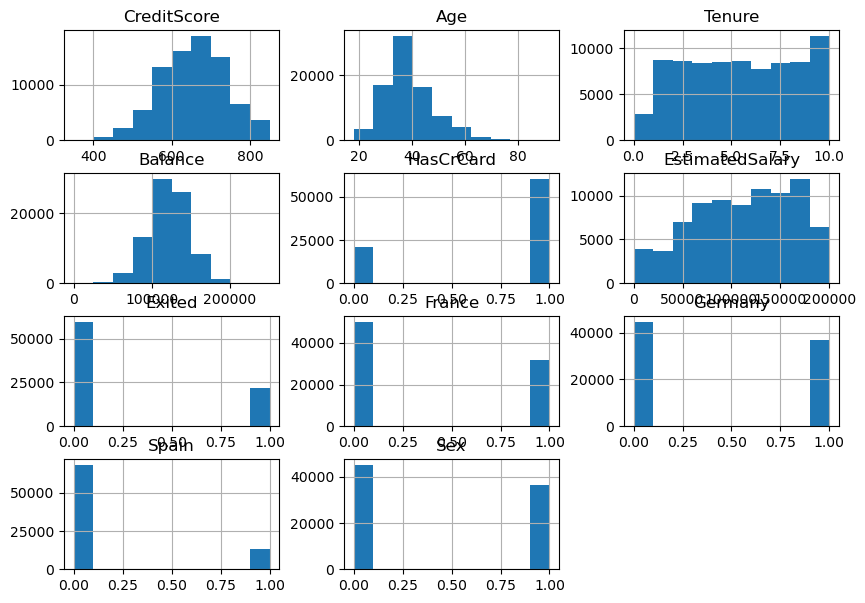

In [9]:
# To check for distribution

plt.rcParams['figure.figsize'] = (10, 7) # inches

df.hist();

In [10]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,EstimatedSalary,Exited,France,Germany,Spain,Sex
0,581,34.0,2,148882.54,Savings Account,1,84560.88,0,1,0,0,0
1,588,36.0,4,131778.58,Savings Account,1,136024.31,1,0,1,0,0
2,593,30.0,8,144772.69,Savings Account,1,29792.11,0,1,0,0,1
3,678,37.0,1,138476.41,Savings Account,1,106851.60,0,0,0,1,0
4,583,40.0,4,81274.33,Savings Account,1,170843.07,0,0,1,0,0


## To identify the rate at which customers churcn
#### Exited: Whether the customer has churned (1 = yes, 0 = no).

Churn Rate=( Number of Churned Customers/
Total Number of Customers at the Beginning of the Period

​
 )×100%

In [11]:
# Calculate churn rate using the simple churn rate calculation
total_customers_beginning = len(df)
churned_customers = df['Exited'].sum()  # Since customers who churned is represented with 1
simple_churn_rate = (churned_customers / total_customers_beginning) * 100

print(f'The rate at which customers churned is {simple_churn_rate}')

The rate at which customers churned is 26.86390098331784


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81764 entries, 0 to 81763
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      81764 non-null  int64  
 1   Age              81764 non-null  float64
 2   Tenure           81764 non-null  int64  
 3   Balance          81764 non-null  float64
 4   NumOfProducts    81764 non-null  object 
 5   HasCrCard        81764 non-null  int64  
 6   EstimatedSalary  81764 non-null  float64
 7   Exited           81764 non-null  int64  
 8   France           81764 non-null  int64  
 9   Germany          81764 non-null  int64  
 10  Spain            81764 non-null  int64  
 11  Sex              81764 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 7.5+ MB


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


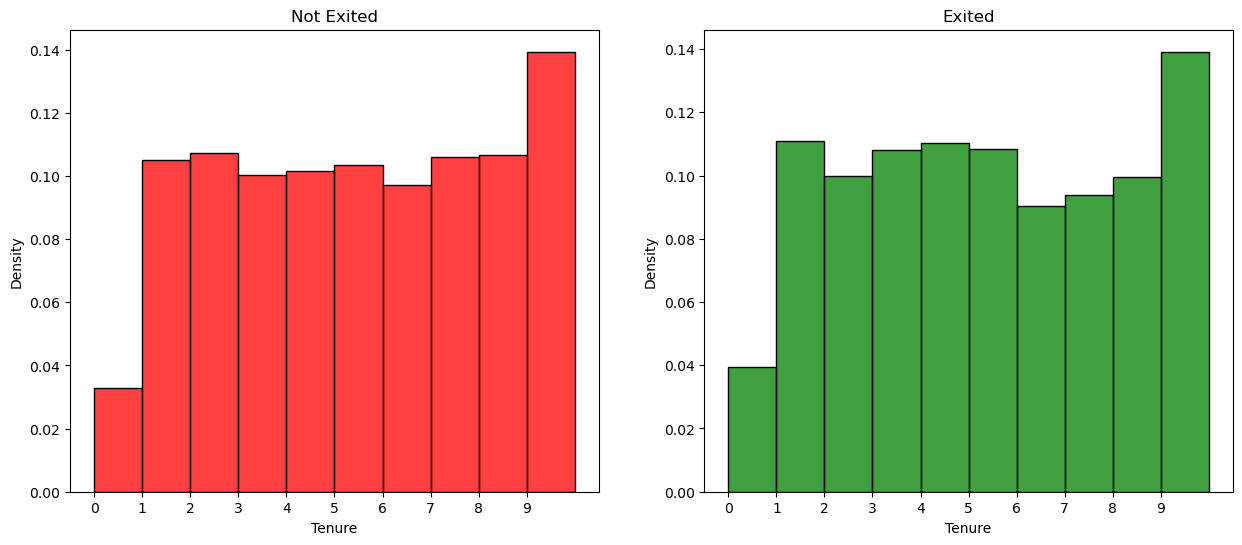

In [13]:
# using our Tenure column, we want to know the tenure with HBS with the most Churn

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plotting the histogram for our no exit (represented by 0)
ax1 = sns.histplot(x='Tenure', data=df[df['Exited'] == 0],
                  stat='density', bins=10, ax=ax1, color='red') 

# Plotting the histogram for exited (represented by 1)
ax2 = sns.histplot(x='Tenure', data=df[df['Exited'] == 1],
                  stat='density', bins=10, ax=ax2, color='green') 

ax1.set_title('Not Exited')
ax2.set_title('Exited')

# ticks is set to prevent the system from assuming figs like 5,10 15
ax1.set_xticks(np.arange(10)) #ticks from 0-10
ax2.set_xticks(np.arange(10)) #ticks from 0-10

In [14]:
# To determine the Tenure of customers with HBS Bank that Exited:

Exited_tenure = df.groupby('Tenure')['Exited'].sum()
Exited_tenure

Tenure
0      865
1     2439
2     2193
3     2375
4     2422
5     2381
6     1984
7     2065
8     2184
9     2224
10     833
Name: Exited, dtype: int64

In [15]:
# To determine the highest and lowest tenure that exited:

highest_Exited_tenure = Exited_tenure.idxmax() # the index with the highest (max)
 
lowest_Exited_tenure = Exited_tenure.idxmin() # the index with the lowest (min)
 
print(f'The Tenure with the highest exit at HBS bank is {highest_Exited_tenure} \nWhile the tenure with the lowest exit at HBS bank is {lowest_Exited_tenure}')

The Tenure with the highest exit at HBS bank is 1 
While the tenure with the lowest exit at HBS bank is 10


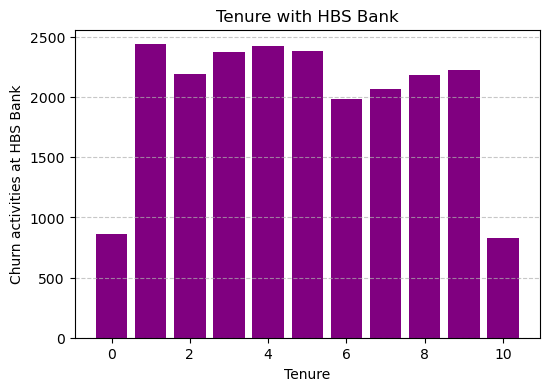

In [16]:
# Uisng visualization to observe this.
# histogram representation - matplotlib
 
plt.figure(figsize=(6, 4))
plt.bar(Exited_tenure.index, Exited_tenure.values, color='purple')
plt.xlabel('Tenure')
plt.ylabel('Churn activities at HBS Bank')
plt.title('Tenure with HBS Bank')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Identifing survival probability of entire population using the Kaplan-Meier Curve.

In [17]:
# need to first install lifelines

!pip install lifelines

Defaulting to user installation because normal site-packages is not writeable


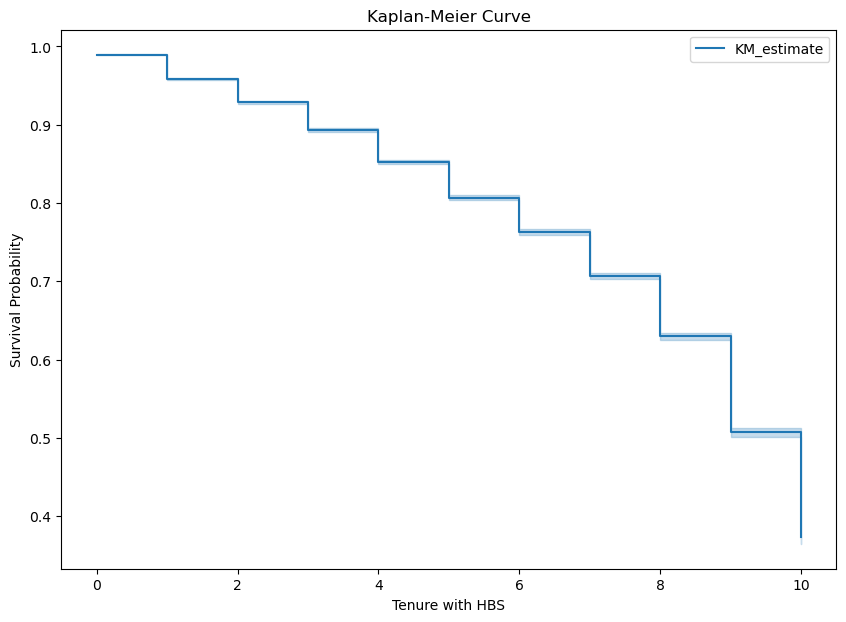

In [18]:

from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Create KaplanMeierFitter object
kmf = KaplanMeierFitter()

Tenure_tolist = df.Tenure.tolist()
Exited_tolist = df.Exited.tolist()

# Fit the model
kmf.fit(Tenure_tolist, Exited_tolist)

# Plot the Kaplan-Meier curve
kmf.plot()
plt.title('Kaplan-Meier Curve')
plt.xlabel('Tenure with HBS')
plt.ylabel('Survival Probability')
plt.show()


### To identify survival probability of entire population based on account type(covariate)

In [19]:
# Checking for number of products at HBS bank
df['NumOfProducts'].value_counts()

NumOfProducts
Savings Account     56694
Checking Account    22991
Credit Card          1711
Loan Product          368
Name: count, dtype: int64

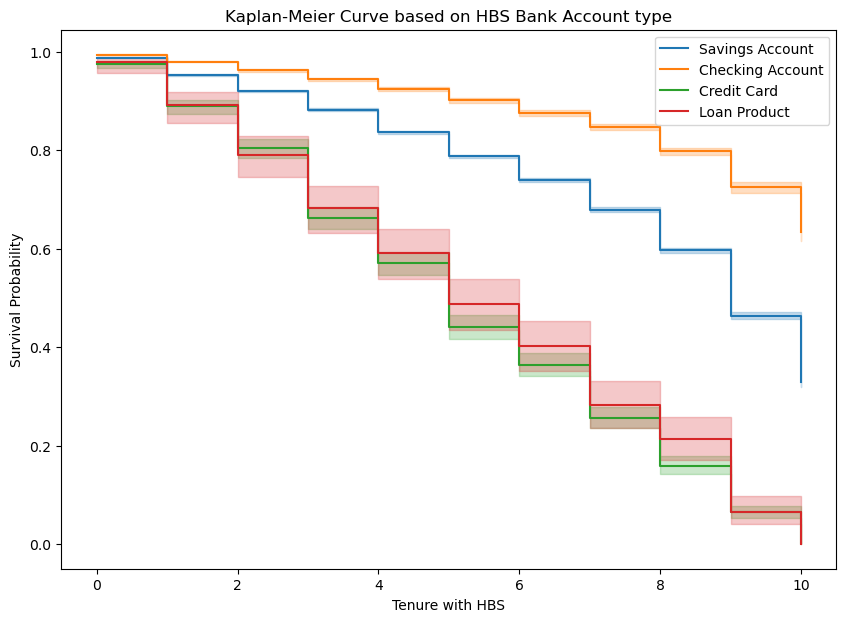

In [20]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# Create KaplanMeierFitter object
kmf = KaplanMeierFitter()

T = df['Tenure']   #time to event
E = df['Exited']   #Event occurred

# HBS Bank has 4 types of products, we will create our cohorts from these 4 groups:

groups = df['NumOfProducts']    #Creating the cohorts from the 'NumOfProducts' column

ix1 = (groups == 'Savings Account')  #Cohort 1
ix2 = (groups == 'Checking Account')  #Cohort 2
ix3 = (groups == 'Credit Card')  #Cohort 3
ix4 = (groups == 'Loan Product')  #Cohort 4


kmf.fit(T[ix1], E[ix1], label='Savings Account')   #Fitting the cohort 1 data
ax = kmf.plot()


kmf.fit(T[ix2], E[ix2], label='Checking Account')   #Fitting the cohort 2 data
ax1 = kmf.plot(ax=ax)


kmf.fit(T[ix3], E[ix3], label='Credit Card')   #Fitting the cohort 3 data
ax2 = kmf.plot(ax=ax1)


kmf.fit(T[ix4], E[ix4], label='Loan Product')   #Fitting the cohort 4 data
ax3 = kmf.plot(ax=ax2)                          ## plotting the KM curve for the 4 cohorts on the same x and y axis


plt.title('Kaplan-Meier Curve based on HBS Bank Account type')
plt.xlabel('Tenure with HBS')
plt.ylabel('Survival Probability')
plt.show()





### To identify what variables are statistically significant in predicting customer churn using a cox proportional hazards model.

In [21]:
# We need to convert the NumOfProducts dtype to numerical by encoding:

# Creating our one-hot encoding using (pandas.get_dummies)

dummy = pd.get_dummies(df['NumOfProducts'], dtype=int)
dummy

,Checking Account,Credit Card,Loan Product,Savings Account
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1
...,...,...,...,...
81759,1,0,0,0
81760,0,0,0,1
81761,0,0,0,1
81762,0,0,0,1


In [22]:
# join the above encoded NumOfProducts df to the original dataframe-we use a pd.concat() function.

df = pd.concat([df, dummy], axis=1)


# Dropping the NumOfProducts column
df = df.drop('NumOfProducts', axis=1)

df.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,EstimatedSalary,Exited,France,Germany,Spain,Sex,Checking Account,Credit Card,Loan Product,Savings Account
0,581,34.0,2,148882.54,1,84560.88,0,1,0,0,0,0,0,0,1
1,588,36.0,4,131778.58,1,136024.31,1,0,1,0,0,0,0,0,1
2,593,30.0,8,144772.69,1,29792.11,0,1,0,0,1,0,0,0,1
3,678,37.0,1,138476.41,1,106851.60,0,0,0,1,0,0,0,0,1
4,583,40.0,4,81274.33,1,170843.07,0,0,1,0,0,0,0,0,1


In [23]:
from lifelines import CoxPHFitter




# Fit a Cox Proportional Hazards model
cph = CoxPHFitter(penalizer=0.1)
cph.fit(df, 'Tenure', 'Exited', show_progress=True)

# Assess variable significance
# Display summary statistics including p-values and confidence intervals
print(cph.summary)


Iteration 1: norm_delta = 5.86e-01, step_size = 0.9500, log_lik = -230055.79235, newton_decrement = 6.25e+03, seconds_since_start = 0.4
Iteration 2: norm_delta = 9.18e-02, step_size = 0.9500, log_lik = -224967.32159, newton_decrement = 4.89e+02, seconds_since_start = 0.5
Iteration 3: norm_delta = 2.54e-02, step_size = 0.9500, log_lik = -224433.99274, newton_decrement = 2.79e+01, seconds_since_start = 1.0
Iteration 4: norm_delta = 1.75e-03, step_size = 1.0000, log_lik = -224404.91930, newton_decrement = 1.16e-01, seconds_since_start = 1.1
Iteration 5: norm_delta = 8.03e-06, step_size = 1.0000, log_lik = -224404.80257, newton_decrement = 2.44e-06, seconds_since_start = 1.5
Iteration 6: norm_delta = 1.77e-10, step_size = 1.0000, log_lik = -224404.80256, newton_decrement = 1.19e-15, seconds_since_start = 1.6
Convergence success after 6 iterations.
                          coef  exp(coef)      se(coef)  coef lower 95%  \
covariate                                                            

### Detailed explanation of the Cox regression model summary

#### 1. Coefficients (Beta Estimates)
These are the estimated coefficients for each predictor variable in the model. Each coefficient represents the log hazard ratio for a one-unit increase in the predictor variable.

Interpretation: If the coefficient is positive, the hazard (or risk of the event occurring) increases with the predictor. If negative, the hazard decreases with the predictor.
In essence, churn rate increases with Age, Balance, Estimated salary, Germany, Sex, Credit card, Loan product and savings account since they are all positive.


#### 2. Hazard Ratios (exp(Beta))
The hazard ratio (HR) is the exponentiation of the coefficients. It provides a more interpretable measure of the effect of the predictor variables.

Interpretation: An HR greater than 1 indicates an increased hazard (or risk), while an HR less than 1 indicates a decreased hazard.

In essence, churn rate increases with Age, Balance, Estimated salary, Germany, Sex, Credit card, Loan product and savings account since they are all greater than 1

#### 3. Standard Errors (SE)
These are the standard errors of the estimated coefficients. They measure the variability or uncertainty in the coefficient estimates.

#### 4. z-values (or Wald Statistics)
These are the test statistics for each coefficient, calculated as the coefficient divided by its standard error. They follow a standard normal distribution under the null hypothesis that the coefficient is zero.

Interpretation: A large absolute value of the z-value suggests that the corresponding coefficient is significantly different from zero.

In essence, churn rate increases with Age, Balance, Estimated salary, Germany, Sex, Credit card, Loan product and savings account since they all have large absolute value greater than 0.

#### 5. p-values
The p-values assess the statistical significance of each predictor. They indicate the probability of observing the data if the null hypothesis (that the coefficient is zero) is true.

Interpretation: A small p-value (typically < 0.05) suggests that the predictor is significantly associated with the survival outcome.

#### 6. -log2(p):
The -log2(p) in the cph.summary table provides a convenient way to interpret the significance of predictor variables in the Cox Proportional Hazards model. Larger values indicate more significant predictors. So, this indicates that credit Card, Loan Product, Germany, Sex, Savings account has more siginificance in prediction than other features.


In summary, looking at majority of these metrics and the visual below which is based on the log of hazard ratio (HR), the churn hazard increases with the predictor as ranked from top to bottom on the y-axis.

<Axes: xlabel='log(HR) (95% CI)'>

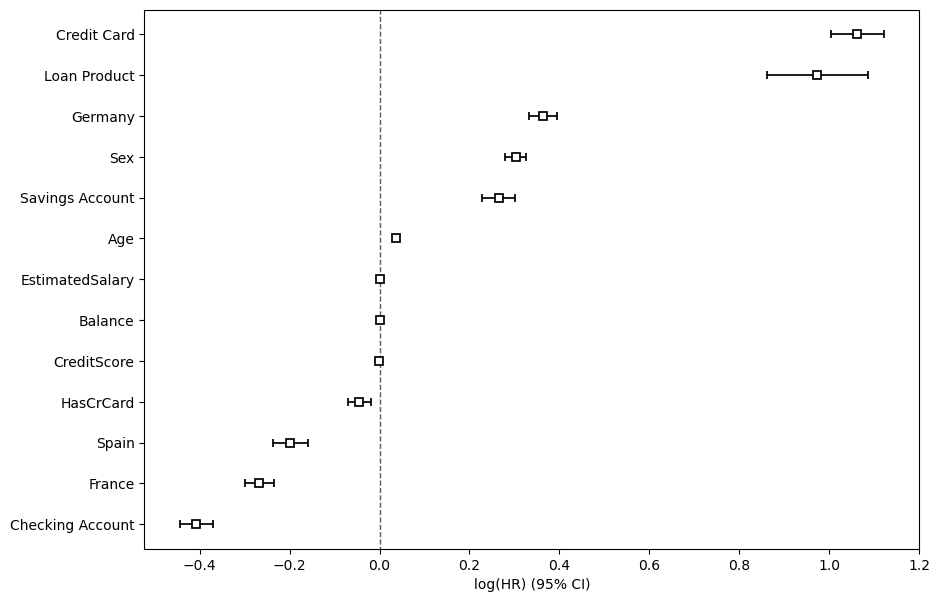

In [24]:
# Visualizing this, we can see the features with more significance in our prediction

cph.plot()

## Preparing our model

In [25]:
# Libraries needed:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, precision_score, recall_score, classification_report


In [26]:
# Setting our target variable and independent variable

X = df.drop(columns = ['Exited'], axis = 1)
y = df['Exited']

X.head()

,CreditScore,Age,Tenure,Balance,HasCrCard,EstimatedSalary,France,Germany,Spain,Sex,Checking Account,Credit Card,Loan Product,Savings Account
0,581,34.0,2,148882.54,1,84560.88,1,0,0,0,0,0,0,1
1,588,36.0,4,131778.58,1,136024.31,0,1,0,0,0,0,0,1
2,593,30.0,8,144772.69,1,29792.11,1,0,0,1,0,0,0,1
3,678,37.0,1,138476.41,1,106851.60,0,0,1,0,0,0,0,1
4,583,40.0,4,81274.33,1,170843.07,0,1,0,0,0,0,0,1


In [27]:
y[:5]

0    0
1    1
2    0
3    0
4    0
Name: Exited, dtype: int64

In [28]:
# The diff between the min value and max value in our dataset is wide so we need to scale our dataset:


# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data = scaler.fit_transform(X)

# Create a DataFrame with the scaled data
X_scaled = pd.DataFrame(scaled_data, columns=X.columns)

In [29]:



X_train, X_test, y_train, y_test = train_test_split(X_scaled, 
                                                    y, 
                                                    test_size=0.3)

In [30]:
# Using the Logistic regression model:

# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets and check score

model.fit(X_train,y_train)
model.score(X_train,y_train)

# Equation coefficient and intercept

print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)



Coefficient: 
 [[-0.05889062  0.73004722 -0.04308237  0.00219937 -0.03905265  0.04713333
  -0.24497815  0.34889636 -0.14791162  0.31115955 -0.38865117  0.51236527
   0.22062949  0.18786603]]
Intercept: 
 [-1.26153067]


In [31]:
# Predict output

y_pred = model.predict(X_test)

In [32]:
print(classification_report(y_test, y_pred, target_names=["Not Exited=0", "Exited=1"]))

              precision    recall  f1-score   support

Not Exited=0       0.81      0.93      0.87     17929
    Exited=1       0.71      0.42      0.53      6601

    accuracy                           0.80     24530
   macro avg       0.76      0.68      0.70     24530
weighted avg       0.79      0.80      0.78     24530



In [33]:
X.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'HasCrCard',
       'EstimatedSalary', 'France', 'Germany', 'Spain', 'Sex',
       'Checking Account', 'Credit Card', 'Loan Product', 'Savings Account'],
      dtype='object')

In [36]:
# Now, let's check our accurracy using the features that are statistically significant based on our cox proportional hazard model.

# Starting by removing the features below the zero mark on the cox plot


columns_to_drop = ['HasCrCard', 'Spain', 'Checking Account', 'France', 'Tenure', 'Exited']
X1 = df.drop(columns_to_drop, axis = 1)
y1 = df['Exited']

X1.head()




,CreditScore,Age,Balance,EstimatedSalary,Germany,Sex,Credit Card,Loan Product,Savings Account
0,581,34.0,148882.54,84560.88,0,0,0,0,1
1,588,36.0,131778.58,136024.31,1,0,0,0,1
2,593,30.0,144772.69,29792.11,0,1,0,0,1
3,678,37.0,138476.41,106851.60,0,0,0,0,1
4,583,40.0,81274.33,170843.07,1,0,0,0,1


In [37]:
# Scaling our dataset 

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data1 = scaler.fit_transform(X1)

# Create a DataFrame with the scaled data
X1_scaled = pd.DataFrame(scaled_data1, columns=X1.columns)

In [40]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1_scaled, 
                                                    y1, 
                                                    test_size=0.3)

In [41]:
# Using the Logistic regression model:

# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets and check score

model.fit(X1_train,y1_train)
model.score(X1_train,y1_train)

# Equation coefficient and intercept

print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)


# Predict output

y1_pred = model.predict(X1_test)


print(classification_report(y1_test, y1_pred, target_names=["Not Exited=0", "Exited=1"]))

Coefficient: 
 [[-0.07095873  0.72604209  0.01511185  0.0536842   0.58846656  0.31183624
   0.6388641   0.26721919  0.59360106]]
Intercept: 
 [-1.25676895]
              precision    recall  f1-score   support

Not Exited=0       0.82      0.94      0.87     17975
    Exited=1       0.71      0.42      0.53      6555

    accuracy                           0.80     24530
   macro avg       0.76      0.68      0.70     24530
weighted avg       0.79      0.80      0.78     24530



In [36]:
X1.columns

Index(['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Germany', 'Sex',
       'Credit Card', 'Loan Product', 'Savings Account'],
      dtype='object')

In [42]:
# Now, let's see if we can get even more higher accurracy for our model by removing the features on the zero mark and below on the cox plot:


columns_to_drop1 = ['EstimatedSalary', 'Balance', 'CreditScore', 'HasCrCard', 'Spain', 'Checking Account', 'France', 'Tenure', 'Exited']
X2 = df.drop(columns_to_drop1, axis = 1)
y2 = df['Exited']

X2.head()



,Age,Germany,Sex,Credit Card,Loan Product,Savings Account
0,34.0,0,0,0,0,1
1,36.0,1,0,0,0,1
2,30.0,0,1,0,0,1
3,37.0,0,0,0,0,1
4,40.0,1,0,0,0,1


In [43]:
# Scaling our dataset 

# Initialize StandardScaler
scaler = StandardScaler()

# Fit and transform the data
scaled_data2 = scaler.fit_transform(X2)

# Create a DataFrame with the scaled data
X2_scaled = pd.DataFrame(scaled_data2, columns=X2.columns)

In [44]:
X2_train, X2_test, y2_train, y2_test = train_test_split(X2_scaled, 
                                                    y2, 
                                                    test_size=0.3)

In [45]:
# Using the Logistic regression model:

# Create logistic regression object
model = LogisticRegression()

# Train the model using the training sets and check score

model.fit(X2_train,y2_train)
model.score(X2_train,y2_train)

# Equation coefficient and intercept

print('Coefficient: \n', model.coef_)
print('Intercept: \n', model.intercept_)


# Predict output

y2_pred = model.predict(X2_test)


print(classification_report(y2_test, y2_pred, target_names=["Not Exited=0", "Exited=1"]))

Coefficient: 
 [[0.73901503 0.5840003  0.30683143 0.62621538 0.27568349 0.59151648]]
Intercept: 
 [-1.25895575]
              precision    recall  f1-score   support

Not Exited=0       0.81      0.93      0.87     17947
    Exited=1       0.70      0.42      0.52      6583

    accuracy                           0.80     24530
   macro avg       0.76      0.68      0.70     24530
weighted avg       0.78      0.80      0.78     24530



#### Trying to look for a model to be selected

LR, 0.7981620834830656, 0.004370670545120975
LDA, 0.7975155816276056, 0.004415711599338045
KNN, 0.7790651493544322, 0.005272668658926303
CART, 0.80875017232194, 0.005408003505746818
RF, 0.808802598486644, 0.005403588330998049
NB, 0.7518960480794392, 0.007115660861779561
SVM, 0.8070903503010459, 0.004620321138912607


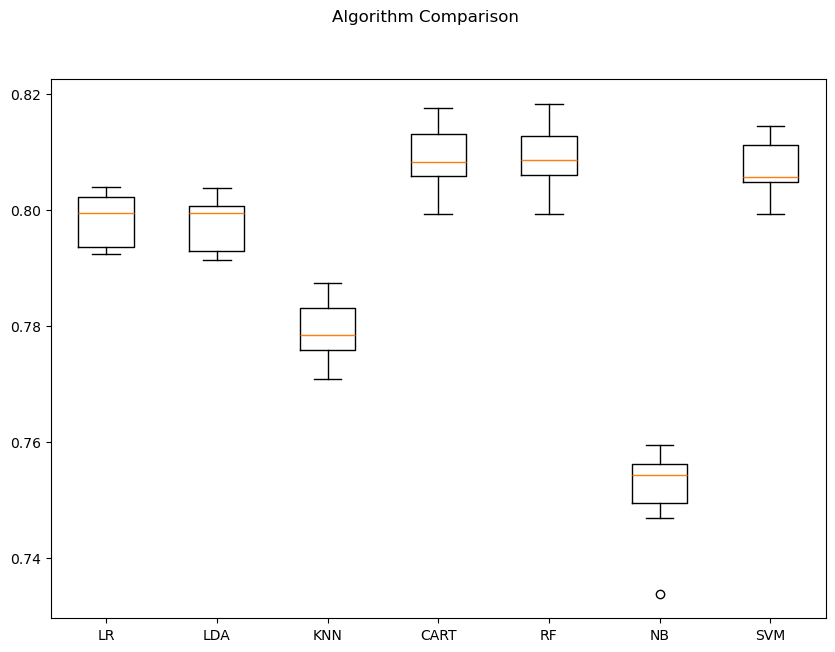

In [46]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
import matplotlib.pyplot as plt

# prepare configuration for cross-validation test harness
seed = 7

# prepare models
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('RF', RandomForestClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X2_train, y2_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    # msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    # print(msg)
    message = f"{name}, {cv_results.mean()}, {cv_results.std()}"
    print(message)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

## Model selection

After inputting the most siginificant features into a loop of 7 different classifier models, RandomForestClassifier came up with the highest accuracy with 80.9% followed by DecisionTreeClassifier with 80.8%.
For this project, I will be selecting the RandomForestClassifier to build my model.

In [47]:
# Importing the needed library

from sklearn.ensemble import RandomForestClassifier


# Using the RandomForest model:

# Create RandomForest object
modelRF = RandomForestClassifier()

# Train the model using the training sets and check score

modelRF.fit(X2_train,y2_train)
modelRF.score(X2_train,y2_train)




# Predict output

y2_pred = modelRF.predict(X2_test)


print(classification_report(y2_test, y2_pred, target_names=["Not Exited=0", "Exited=1"]))


              precision    recall  f1-score   support

Not Exited=0       0.82      0.94      0.88     17947
    Exited=1       0.73      0.45      0.56      6583

    accuracy                           0.81     24530
   macro avg       0.78      0.69      0.72     24530
weighted avg       0.80      0.81      0.79     24530



In [48]:
y2_pred.shape

(24530,)

In [49]:
X2_test.shape

(24530, 6)

In [50]:

from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
 
print('precision:',precision_score(y2_test, y2_pred))

print('F1:',f1_score(y2_test, y2_pred))

print('recall:',recall_score(y2_test, y2_pred))

print('Accuracy:',accuracy_score(y2_test, y2_pred))

precision: 0.7324746098588061
F1: 0.5568738229755179
recall: 0.44918730062281637
Accuracy: 0.8081532816958826


In [51]:
print(confusion_matrix(y2_test, y2_pred))
print('\n')
print(classification_report(y2_test,y2_pred))

[[16867  1080]
 [ 3626  2957]]


              precision    recall  f1-score   support

           0       0.82      0.94      0.88     17947
           1       0.73      0.45      0.56      6583

    accuracy                           0.81     24530
   macro avg       0.78      0.69      0.72     24530
weighted avg       0.80      0.81      0.79     24530



### In conclusion

Based on the Per-Class Metrics indicated above from our selected model:

In this model, Not Exited = 0 (which means the customer is still with HBS bank)  while Exited = 1(which means, customer actually churned) 

Precision(0.71):  This metric represents the proportion of positive predictions that were actually correct. In simpler terms, this is how accurate the model is when it predicts a positive class.

Recall (0.48): This metric focuses on completeness. It represents the proportion of actual positive cases that were correctly identified by the model. In other words, it shows how good the model is at finding all the relevant positive cases.

F1-Score (0.57):  This is a harmonic mean of precision and recall, combining both metrics into a single score. An F1-score of 1 indicates perfect precision and recall, while a score closer to 0 suggests poor performance. In our model, F1 score is slightly above the mid-point which shows an average performance.

Support: This value simply represents the total number of true instances for a particular class in your dataset.

#### Summary and Model selection



In summary, I would advise the new manager to make adjustments such as our marketing strategy on these products that HBS bank offers which are: Credit Card, Loan Product, Savings account with more emphasis on Credit Card and Loan Product as they look like a major product to keep them with HBS bank, so also, the target audience will be customers in Germany as this was established by the cox proportional hazards model which made us know the statistical significant features.


After inputting the most siginificant features into a loop of 7 different classifier models, RandomForestClassifier came up with the highest accuracy with 80.9% followed by DecisionTreeClassifier with 80.8%
